In [6]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
# 경고 무시
warnings.filterwarnings('ignore')

In [16]:
# 데이터 로딩
iris_data = load_iris()

# 데이터셋 분리
X_train, X_test, y_train, y_test =\
train_test_split(
      iris_data.data
    , iris_data.target
    , test_size = 0.2
    , random_state = 11
)

In [17]:
# 모델 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 학습데이터로 모델 생성
dt_clf.fit(
      X_train # 학습데이터
    , y_train # 학습 답
)

DecisionTreeClassifier(random_state=156)

In [18]:
# 시각화에 필요한 dot 파일을 생성
from sklearn.tree import export_graphviz
export_graphviz(
      dt_clf # 학습(fitting)한 모델
    , out_file = 'tree.dot' # 저장할 dot파일 이름
    , class_names = iris_data.target_names
    , feature_names = iris_data.feature_names # 컬럼명
    , impurity = True
    , filled = True
)

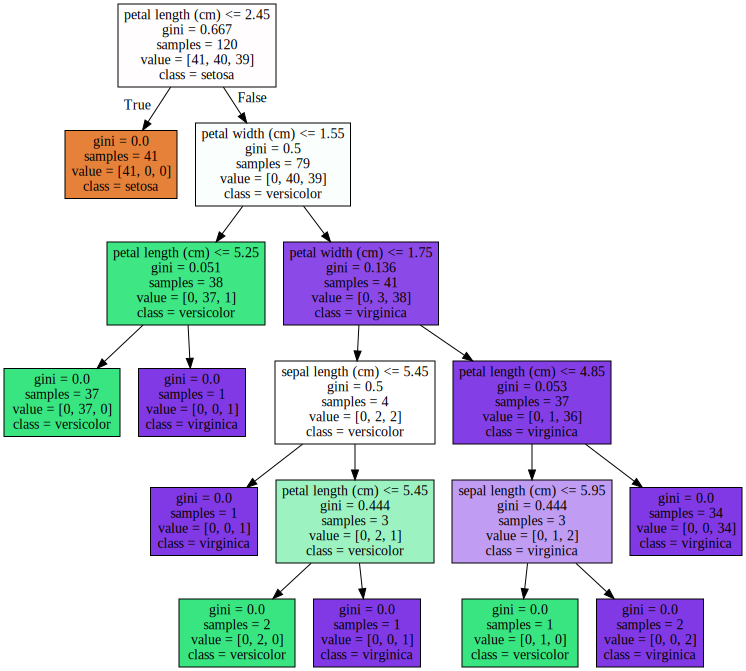

In [19]:
# 그래프 시각화
import graphviz

# f = open('tree.dot')
# # 처리코드 
# f.close()
with open('tree.dot') as f:
    dot_graph = f.read() # 전체를 읽는다
    
graphviz.Source(dot_graph)
    

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
# 피처의 중요도 추출
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [23]:
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


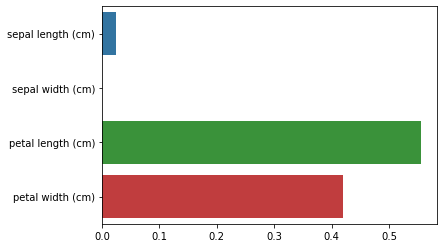

In [24]:
sns.barplot(
      x = dt_clf.feature_importances_ # 중요도 값
    , y = iris_data.feature_names 
)

In [25]:
from sklearn.datasets import make_classification

### 결정 트리 과적합 예제

In [26]:
# 임의의 데이터로 예제 처리
# 피처 : 2개, 답 : 3개 임의의 데이터 생성
from sklearn.datasets import make_classification

# 데이터 생성
X_features, y_labels = make_classification(
      n_features=2
    , n_redundant=0
    , n_informative=2
    , n_classes=3
    , n_clusters_per_class=1
    , random_state=0
)

In [27]:
X_features[:5], y_labels[:5]

(array([[ 0.12041909, -1.68941375],
        [ 1.09665605,  1.79445113],
        [ 0.88426577,  1.43370121],
        [ 0.95048011, -0.56202253],
        [ 1.04421447,  0.02899023]]),
 array([0, 1, 1, 1, 2]))

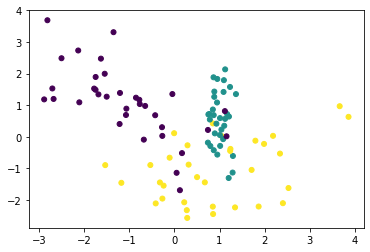

In [33]:
plt.scatter(
      X_features[:,0] # X 축에 들어갈 데이터 지정
    , X_features[:,1] # y 축에 들어갈 데이터 지정
    , marker='o'
    , c=y_labels # 0,1,2
    , s=25
)

### 의사결정나무 실습 - 사용자 행동 인식 데이터 세트

In [39]:
# 데이터 추출 => feature_name_df : 피쳐 이름 DF
feature_name_df = pd.read_csv(
      './data/UCI HAR Dataset/features.txt'
    , sep='\s+'
    , header=None
    , names=['column_index', 'column_name']
    )
feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [45]:
# 피쳐명 추출(사용 x)
feature_name = feature_name_df.iloc[:,1].values # --> ndarray

In [46]:
# 피쳐명 추출
feature_name = feature_name_df.iloc[:,1].tolist() # ndarray 를 list로 변환

In [63]:
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [94]:
len(feature_name)

561

In [111]:
# HAR 데이터셋을 가져오는 function
def get_human_dataset():
    # 피처명
    feature_name_df = \
    pd.read_csv(
          './data/UCI HAR Dataset/features.txt'
        , sep='\s+'
        , header=None
        , names=['column_index', 'column_name']
    )
    
    # 피쳐명 추출
    feature_name = feature_name_df.iloc[:,1].values.tolist() # ndarray 를 list로 변환
    
    X_train = pd.read_csv(
          './data/UCI HAR Dataset/train/X_train.txt'
        , sep='\s+'
        , header=None
#         , names=feature_name # 컬럼명 지정 -- ndarray 형식은 들어갈 수 없음!!!
    )
    
    X_test = pd.read_csv(
          './data/UCI HAR Dataset/test/X_test.txt'
        , sep='\s+'
        , header=None
#         , names=feature_name
    )
    
    y_train = pd.read_csv(
          './data/UCI HAR Dataset/train/y_train.txt'
        , sep='\s+'
        , header=None
        , names=['action']
    )
    
    y_test = pd.read_csv(
          './data/UCI HAR Dataset/test/y_test.txt'
        , sep='\s+'
        , header=None
        , names=['action']
    )
    
    return X_train, X_test, y_train, y_test

In [112]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [113]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [114]:
feature_name = feature_name_df.iloc[:,1].values.tolist()
X_train.columns = feature_name
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [115]:
X_test.columns=feature_name
X_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [116]:
type(y_test)

pandas.core.frame.DataFrame

In [117]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [118]:
# 답의 분포 확인 : 균형을 이루고있음 -> 평가지표로 정확도 사용 가능
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [119]:
# 모델 생성, 학습, 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [122]:
# Model
dt_clf = DecisionTreeClassifier(random_state=156)
# fitting
dt_clf.fit(X_train, y_train)
# predict
pred = dt_clf.predict(X_test)
# accuracy
accu = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accu))

결정 트리 예측 정확도 : 0.8548


In [123]:
# 파라미터 디폴트 처리 => 파라미터 확인
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 156,
 'splitter': 'best'}

In [128]:
# max_depth : 지정한게 없다
# 교차검증, 최적 파라미터 추출 : GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {
      'max_depth' : [4,6,8,10,12,16,20,24]    
}

grid_cv = GridSearchCV(
      dt_clf # 1. 적용할 모델
    , param_grid=params # 2. 적용할 파라미터 
    , scoring='accuracy' # 3. 적용할 평가지표 : 정확도
    , cv=5 #4. 교차검증 개수 지정 (비복원 추출)
    , verbose=1 # 출력결과 형태 지정 0 이면 진행상태 출력이 안됨.
)
# 학습 시작
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.6min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [4, 6, 8, 10, 12, 16, 20, 24]},
             scoring='accuracy', verbose=1)

In [129]:
# 정확도 출력
grid_cv.best_score_

0.8513444970102249

In [130]:
# 베스트 파라미터 출력
grid_cv.best_params_

{'max_depth': 16}

In [131]:
# 베스트 점수, 파라미터 값을 한번에 출력
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [132]:
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,4,0.843178
1,6,0.850791
2,8,0.851069
3,10,0.851209
4,12,0.844135
5,16,0.851344
6,20,0.850800
7,24,0.849440


In [134]:
# 베스트 모델 : grid_cv.best_estimator_ => max_depth = 16
# 파라미터를 반복 처리 정확도 출력

max_depths = [4,6,8,10,12,16,20,24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(
          max_depth=depth
        , random_state=156
    )
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    accu = accuracy_score(y_test, pred)
    
    print('max_depth = {0} 정확도 : {1:4f}'.format(depth, accu))

max_depth = 4 정확도 : 0.809637
max_depth = 6 정확도 : 0.855786
max_depth = 8 정확도 : 0.870716
max_depth = 10 정확도 : 0.867323
max_depth = 12 정확도 : 0.864608
max_depth = 16 정확도 : 0.857482
max_depth = 20 정확도 : 0.854768
max_depth = 24 정확도 : 0.854768


In [135]:
# parameter : max_depth, min_samples_split
params = {
      'max_depth' : [8,12,16,20]
    , 'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(
      dt_clf # 1. 적용할 모델
    , param_grid=params # 2. 적용할 파라미터 
    , scoring='accuracy' # 3. 적용할 평가지표 : 정확도
    , cv=5 #4. 교차검증 개수 지정 (비복원 추출) 일반적으로 5로하고 홀수로 함.
    , verbose=1 # 출력결과 형태 지정 0 이면 진행상태 출력이 안됨.
)
# 학습 시작
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.8min finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=24, random_state=156),
             param_grid={'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [16, 24]},
             scoring='accuracy', verbose=1)

In [136]:
grid_cv.best_score_

0.8548794147162603

In [137]:
grid_cv.best_params_

{'max_depth': 8, 'min_samples_split': 16}

In [139]:
# best Model object추출
best_grid_clf = grid_cv.best_estimator_
pred1 = best_grid_clf.predict(X_test)
accuracy_score(y_test, pred1)

0.8717339667458432

In [140]:
# 피처 중요도 : 561개 중에 중요도가 높은 피처 20개만 출력
import seaborn as sns

ftr_imp_values = best_grid_clf.feature_importances_
len(ftr_imp_values), type(ftr_imp_values)

(561, numpy.ndarray)

In [141]:
# ndarray => Series 변환 => 정렬
ftr_imp = pd.Series(
      ftr_imp_values # 1. Series로 만들 value : 중요도 값
    , index=X_train.columns # 2. 인덱스에 넣은 value
)

In [142]:
# 정렬해서 상위 20개만 추출
ftr_top20 = ftr_imp.sort_values(ascending=False)[:20]
ftr_top20

tGravityAcc-min()-X                0.253354
fBodyAccJerk-bandsEnergy()-1,16    0.212584
angle(Y,gravityMean)               0.139001
fBodyAccMag-energy()               0.115478
tGravityAcc-arCoeff()-Z,2          0.101885
fBodyGyro-maxInds-X                0.023971
tGravityAcc-energy()-Y             0.020470
tBodyGyro-correlation()-Y,Z        0.016513
tGravityAccMag-arCoeff()1          0.015741
tBodyAcc-correlation()-X,Y         0.009972
fBodyAcc-max()-Y                   0.008825
tBodyGyro-max()-X                  0.008550
tGravityAcc-max()-Y                0.006290
fBodyGyro-max()-X                  0.005247
tBodyGyro-min()-X                  0.004373
tBodyAccJerk-correlation()-X,Y     0.003967
tBodyGyroJerk-max()-X              0.003471
tGravityAcc-arCoeff()-Y,3          0.003025
angle(Z,gravityMean)               0.002987
tGravityAcc-min()-Z                0.002912
dtype: float64

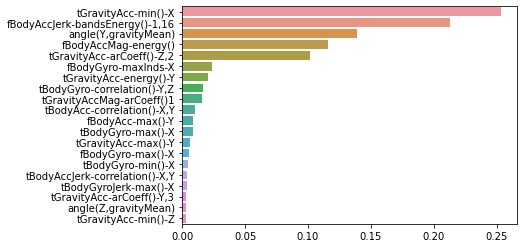

In [143]:
sns.barplot(
      x=ftr_top20
    , y=ftr_top20.index # 피처명
)

### 앙상블 학습 (신뢰성이 높아짐)
- Bagging : 랜덤 샘플링(복원 추출) (같은 알고리즘 기반)
- Boosting : 랜덤 샘플링(복원 추출) + (다른 알고리즘 기반)
- Stacking : 재학습
- Voting -- Hard vs Soft (디폴트 : Soft)
- ㄴ 하드보팅: 예측한 결과값의 다수결로 최종 결정
-  소프트보팅: 각 확률을 평균하여 최종 결정

NameError: name 'pred' is not defined